# Visualization with Dropped NaN Values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load the Cleaned Dataset
Here we load the cleaned dataset from the CSV file for analysis.


In [2]:
df = pd.read_csv('../data/processed/DataScientist_cleaned.csv')

## Drop Rows with NaN Values
We drop rows with missing values in the relevant columns (`Rating`, `Founded`, `Salary Estimate`) to ensure accurate visualizations.


In [3]:
df.dropna(subset=['Rating', 'Founded', 'Salary Estimate', 'Size'], inplace=True)

In [4]:
def parse_salary(salary):
    # k indicates thousands
    if 'K' in salary:
        return int(salary.replace('K', '').replace('$', '').split('-')[0]) * 1000
    else:
        return np.nan

In [5]:
# apply parse_salary
df['salary'] = df['Salary Estimate'].apply(parse_salary)

In [6]:
df.dropna(subset=['salary'], inplace=True)

## Plot Distribution of Salaries


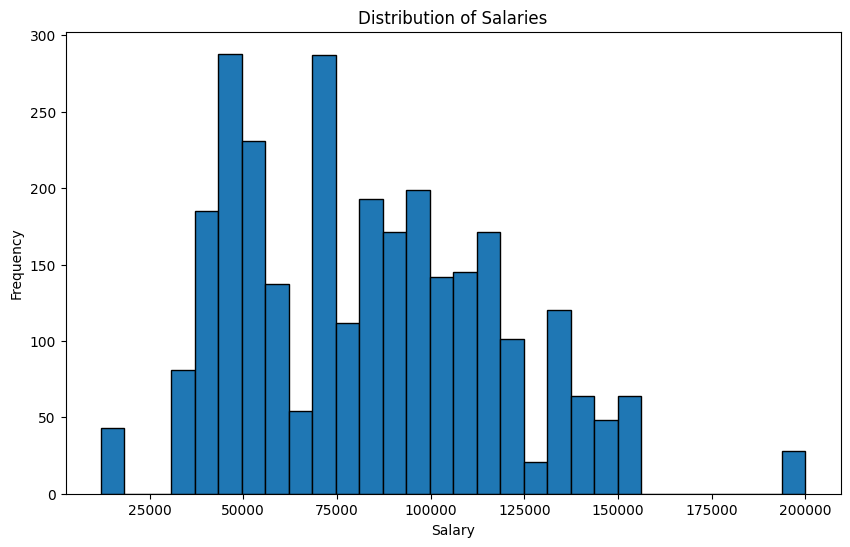

In [7]:
# histogram
plt.figure(figsize=(10, 6))
plt.hist(df['salary'], bins=30, edgecolor='k')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()
# width of each bar represents range of salary
# change number of bins
# outliers at <25000, and 200000

## Top 10 Most Frequently Used Words in Job Descriptions


In [23]:
from collections import Counter
import re

# combining all job description words into a single string, separated by space
all_descriptions = ' '.join(df['Job Description']).lower()

# remove non-alphabetic characters
all_descriptions = re.sub(r'[^a-z\s]', '', all_descriptions)

# split into individual words
words = all_descriptions.split()

# count words
word_counts = Counter(words)
common_words = word_counts.most_common(10)

# separate words and counts into two separate tuples
words, counts = zip(*common_words)

# plot the most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Used Words in Job Descriptions')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'common_words.csv'

## Top 10 Most Frequently Used Words in Job Descriptions (Excluding Common Words)

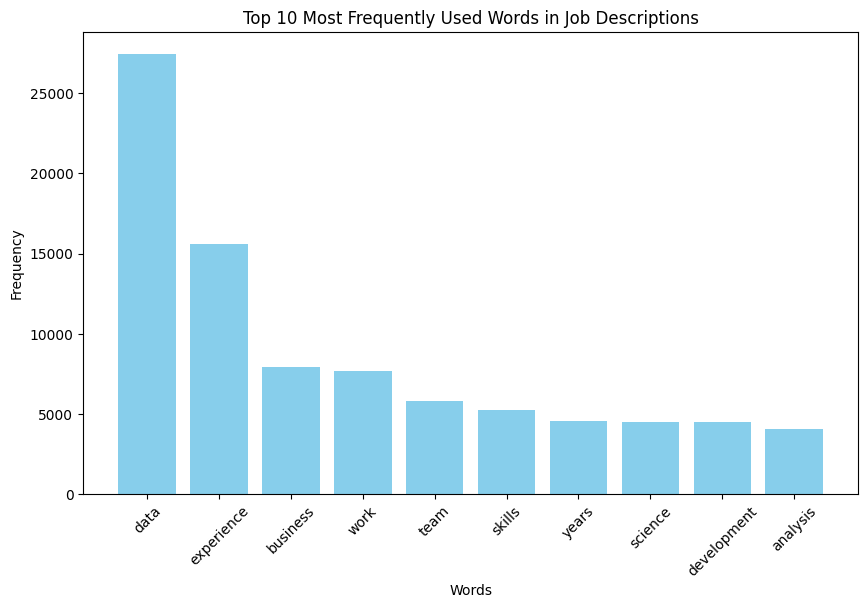

In [22]:
from collections import Counter
import re
import matplotlib.pyplot as plt

# Define the stop words to exclude
stop_words = set(['and', 'the', 'to', 'in', 'a', 'with', 'an', 'for', 'of', 'on', 'at', 'by', 'from', 'about', 'as', 'into', 'like', 'through', 'after', 'over', 'between', 'out', 'against', 'during', 'without', 'before', 'under','other','this', 'around','are','be','that','or', 'is','you','we','will','our', 'among'])

# Combining all job description words into a single string, separated by space
all_descriptions = ' '.join(df['Job Description']).lower()

# Remove non-alphabetic characters
all_descriptions = re.sub(r'[^a-z\s]', '', all_descriptions)

# Split into individual words
words = all_descriptions.split()

# Remove stop words
words = [word for word in words if word not in stop_words]

# Count words
word_counts = Counter(words)
common_words = word_counts.most_common(10)

# Separate words and counts into two separate tuples
words, counts = zip(*common_words)

# Plot the most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Used Words in Job Descriptions')
plt.xticks(rotation=45)
plt.show()


## Correlation Between Ratings and Salaries

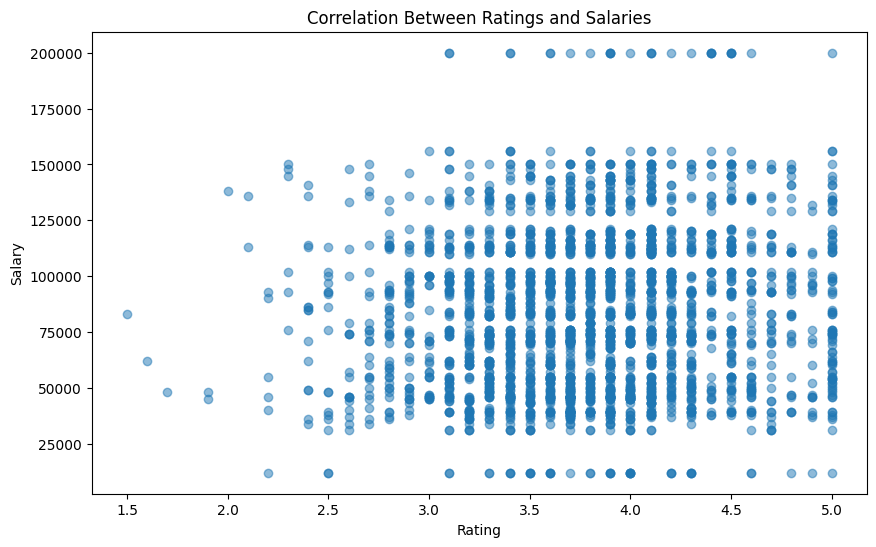

Correlation between ratings and salaries: 0.08994589885587853


In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['salary'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Salary')
plt.title('Correlation Between Ratings and Salaries')
plt.show()
# 1 - if rating increases, salary increases
# -1 - as rating increases, salary decreases
# 0 - no relationship
correlation_rating_salary = df['Rating'].corr(df['salary'])
print(f'Correlation between ratings and salaries: {correlation_rating_salary}')
# positive value: indicates a positive relationship
# near 0, 0.0899 is very close to 0, indicates a weak relationship between ratings and salaries


## Correlation Between Employee Number and Salaries


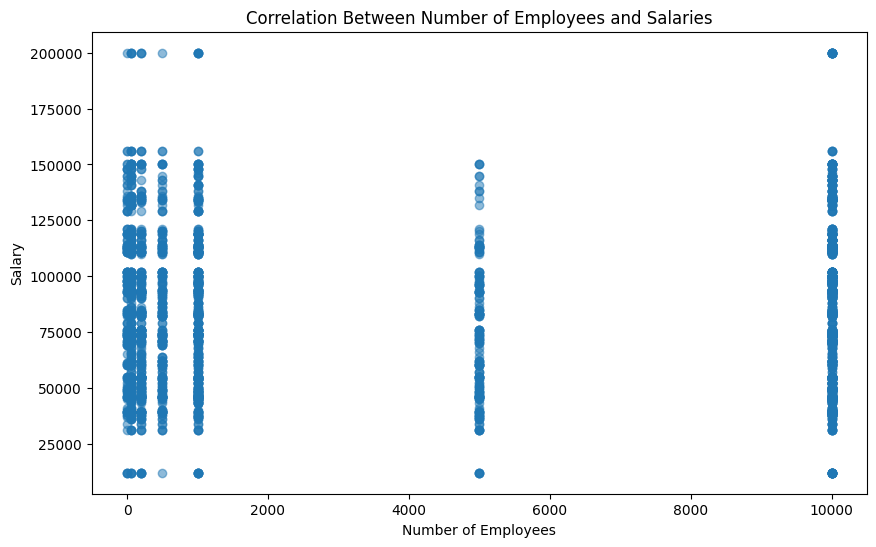

Correlation between number of employees and salaries: 0.015536632688138274


In [10]:
# employee number = size ???
df['Employee Number'] = df['Size'].str.extract('(\d+)', expand=False).astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(df['Employee Number'], df['salary'], alpha=0.5)
plt.xlabel('Number of Employees')
plt.ylabel('Salary')
plt.title('Correlation Between Number of Employees and Salaries')
plt.show()

correlation_employee_salary = df['Employee Number'].corr(df['salary'])
print(f'Correlation between number of employees and salaries: {correlation_employee_salary}')
# week positive correlation

## Count of easy apply jobs

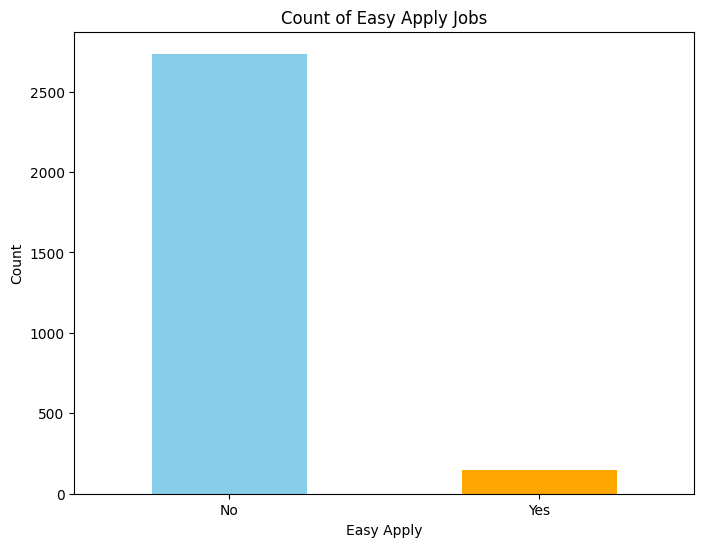

In [11]:
easy_apply_counts = df['Easy Apply'].value_counts()
plt.figure(figsize=(8, 6))
easy_apply_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Easy Apply')
plt.ylabel('Count')
plt.title('Count of Easy Apply Jobs')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


## Average salary by company size

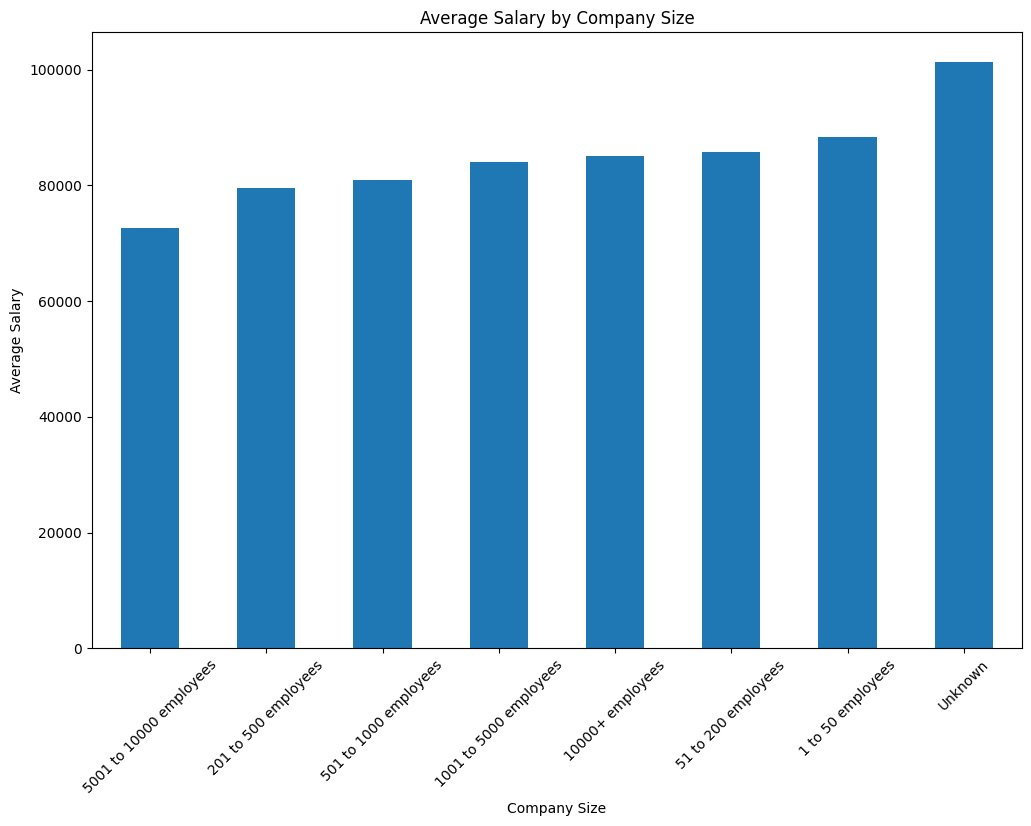

In [12]:
company_size_salary = df.groupby('Size')['salary'].mean().sort_values()
plt.figure(figsize=(12, 8))
company_size_salary.plot(kind='bar')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=45)
plt.show()
